In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [284]:
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv") #нестационарный ряд
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv") #станиционарный ряд

In [285]:
#Отрисовка просто временного ряда
def plot(y, title, figsize=(16, 6)):
    plt.style.use('bmh')
    plt.figure(figsize=figsize)
    plt.plot(y, linewidth = 3.0)
    plt.title(title)
    return

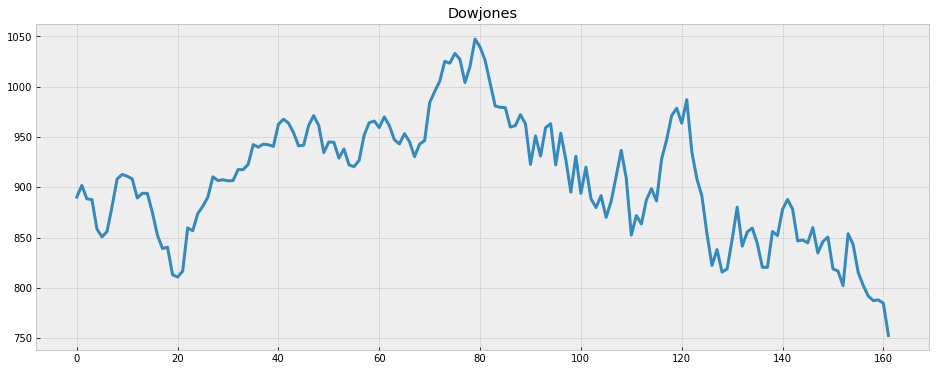

In [286]:
dowjones = dowjones_closing['Close']
plot(dowjones, 'Dowjones')

#### Сделаем простое сглаживание

In [287]:
def moving_average(series, n):
    return series.rolling(n).mean()

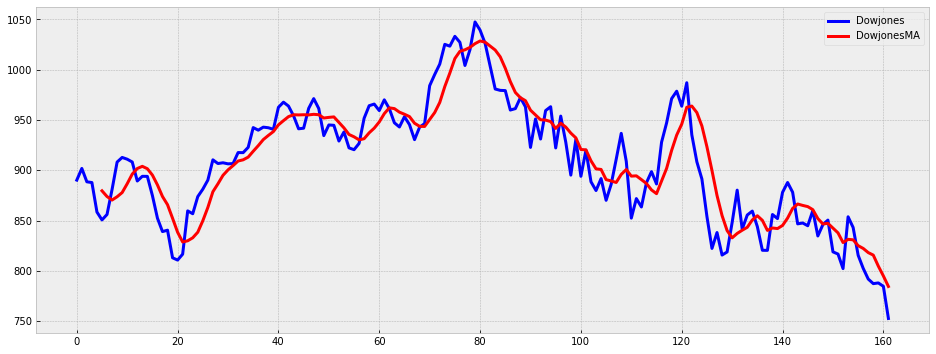

In [288]:
plt.style.use('bmh')
plt.figure(figsize = (16,6))
plt.plot(dowjones, linewidth = 3.0, label = 'Dowjones', color = 'blue')
plt.plot(moving_average(dowjones, 6), linewidth = 3.0, label = 'DowjonesMA', color = 'red')
plt.legend()
plt.show()

#### Для индекса Dowjones сильная выраженная сезонность отсутсвует, поэтому метод Хольта-Винтерса не совсем подходит для данного временного ряда, вероятнее всего двойное экспотенциальное сглаживание подойдет.

In [289]:
#функция для двойного сглаживания
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [290]:
#график для двойного сглаживания
def plot_dema(series, label, alpha, beta):
    dema = double_ema(series, alpha, beta)
    plt.style.use('bmh')
    plt.figure(figsize=(16, 6))
    plt.plot(series, color='blue',label=label)
    plt.plot(dema, color='red', linewidth='2', label=label+'DEMA')
    plt.title(f'alpha {alpha}, beta {beta}')
    plt.legend()

#### Построим график с произвольными параметрами 0.3 и 0.3

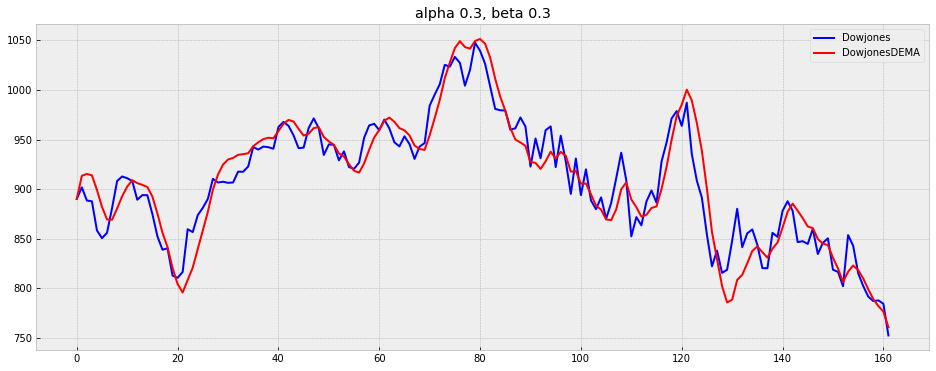

In [291]:
plot_dema(dowjones, 'Dowjones', 0.3, 0.3)

#### Подберем оптимальные значения параметров для двойного сглаживания при использовании среднеквадратичной ошибки

In [292]:
#расчет среднеквадратичной ошибки
def mse(X):
    alpha, beta = X
    result = double_ema(train, alpha, beta)
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [293]:
train, test = dowjones[:120], dowjones[120:]

In [294]:
opt = minimize(mse, x0=[0.3,0.3], method="L-BFGS-B", bounds = ((0, 1), (0, 1)))
opt

      fun: 9227.949657108486
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 9.82254278e-03, -8.07292050e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
     njev: 17
   status: 0
  success: True
        x: array([0.16870452, 1.        ])

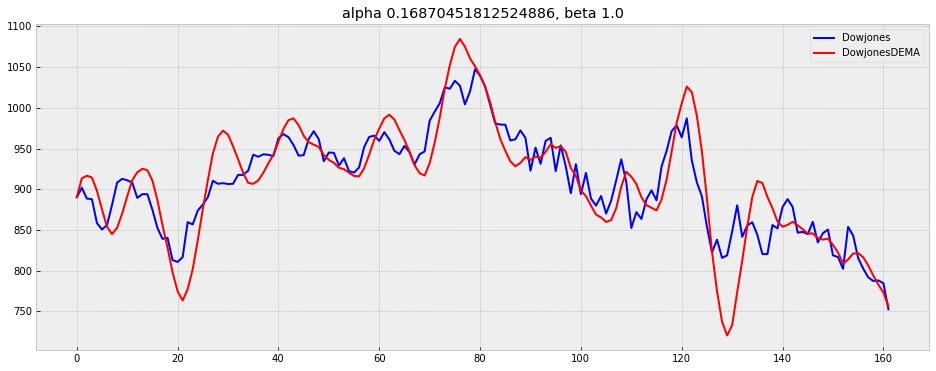

In [295]:
alpha_opt, betta_opt = opt.x
plot_dema(dowjones, 'Dowjones', alpha_opt, betta_opt)

#### Ряд female_births является стационарным, поэтому методы, которые учитывают то, что чем дальше было значение тем меньший вес оно имеет не подходят (wma, экспотенциальные средние различных видов). Для данного ряда подойдет обычное MA

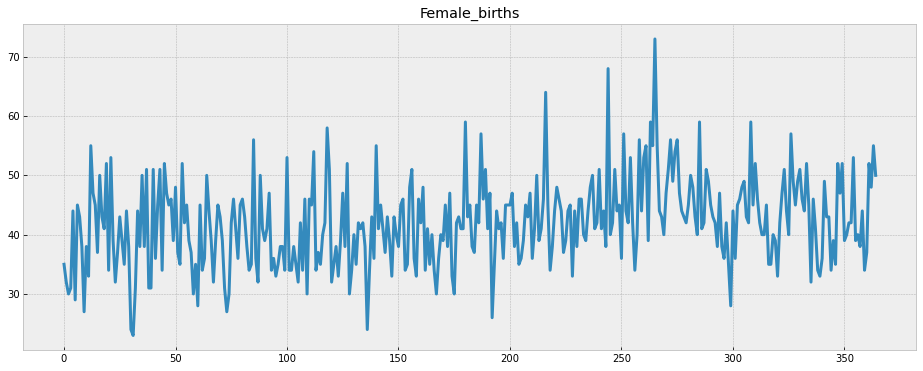

In [296]:
#исходный ряд
female = female_births['Count']
plot(female, 'Female_births')

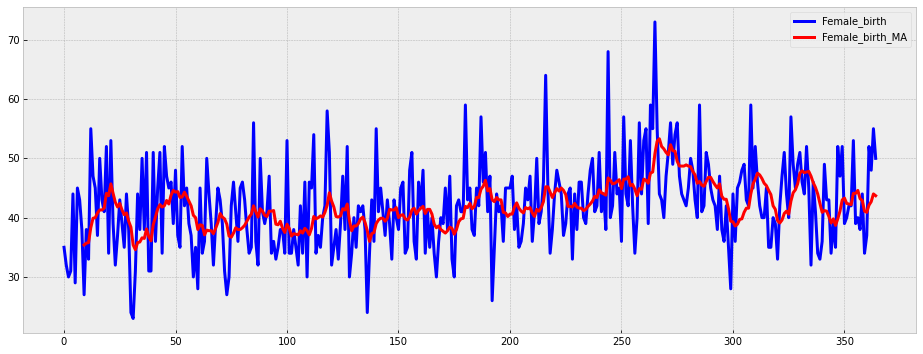

In [297]:
#простое MA
plt.style.use('bmh')
plt.figure(figsize = (16,6))
plt.plot(female, linewidth = 3.0, label = 'Female_birth', color = 'blue')
plt.plot(moving_average(female, 10), linewidth = 3.0, label = 'Female_birth_MA', color = 'red')
plt.legend()
plt.show()